# Chapter 7: Moving Beyond Linearity
## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')
import statsmodels.api as sm

## Importing the dataset

In [2]:
dataset = pd.read_csv('data/Wage.csv')

In [3]:
dataset.shape

(3000, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
Unnamed: 0    3000 non-null int64
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


## Polynomial Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X = dataset.age.values.reshape(-1, 1)
X1 = PolynomialFeatures(degree=1).fit_transform(X)
X2 = PolynomialFeatures(degree=2).fit_transform(X)
X3 = PolynomialFeatures(degree=3).fit_transform(X)
X4 = PolynomialFeatures(degree=4).fit_transform(X)
X5 = PolynomialFeatures(degree=5).fit_transform(X)

In [7]:
print(X4[:5])

[[1.000000e+00 1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [1.000000e+00 2.400000e+01 5.760000e+02 1.382400e+04 3.317760e+05]
 [1.000000e+00 4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [1.000000e+00 4.300000e+01 1.849000e+03 7.950700e+04 3.418801e+06]
 [1.000000e+00 5.000000e+01 2.500000e+03 1.250000e+05 6.250000e+06]]


### Linear Regression

In [8]:
fit1 = sm.GLS(endog=dataset.wage, exog=X4).fit()
fit1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [9]:
fit_1 = sm.GLS(endog=dataset.wage, exog=X1).fit()
fit_2 = sm.GLS(endog=dataset.wage, exog=X2).fit()
fit_3 = sm.GLS(endog=dataset.wage, exog=X3).fit()
fit_4 = sm.GLS(endog=dataset.wage, exog=X4).fit()
fit_5 = sm.GLS(endog=dataset.wage, exog=X5).fit()

In [10]:
# Using ANOVA to decide degree of the model
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


The p-value comparing the linear Model 1 to the quadratic Model 2 is essentially zero (<1e−15 ), indicating that a linear fit is not sufficient. Similarly the p-value comparing the quadratic Model 2 to the cubic Model 3 is very low (0.0017), so the quadratic fit is also insufficient. The p-value comparing the cubic and degree-4 polynomials, Model 3 and Model 4 , is approximately 5% while the degree-5 polynomial Model 5 seems unnecessary because its p-value is 0.37. Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data.

### Logistic regression

In [11]:
y_bi = (dataset.wage.values > 250).astype(np.int)

In [12]:
y_bi

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
clf = sm.GLM(endog=y_bi, exog=X4, family=sm.families.Binomial(sm.families.links.logit)).fit()
clf.summary()

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Tue, 03 Dec 2019   Deviance:                       701.22
Time:                        17:51:25   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.022    -202.956     -16.150
x1             8.9950      4.187      2.148      0.032       0.789      17.201
x2            -0.2816      0.135     -2.081      0.037      -0.547      -0.016
x3             0.0039      0.002      2.022      0.043       0.000       0.008
x4         -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
==============================================================================
"""

In [14]:
age_grid = np.arange(dataset.age.min(), dataset.age.max()).reshape(-1, 1)
X_test = PolynomialFeatures(degree=4).fit_transform(age_grid)
y_pred = clf.predict(X_test)

### Visualize the result

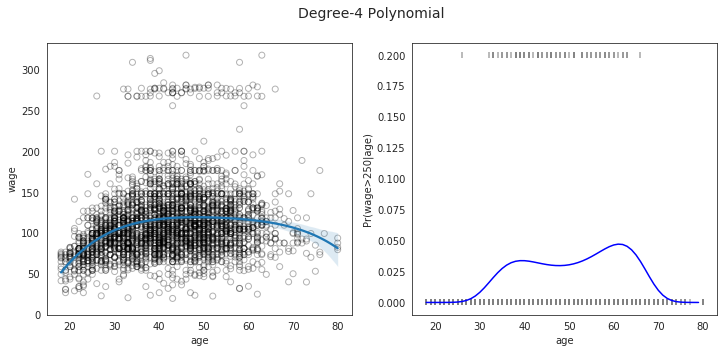

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(dataset.age, dataset.wage, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(dataset.age, dataset.wage, order=4, truncate=True, scatter=False, ax=ax1)
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range
ax2.plot(age_grid, y_pred, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(dataset.age, y_bi/5, color='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

## Step functions

Using pandas.cut to prepare the dataset

In [16]:
df_cut, bins = pd.cut(dataset.age, 4, retbins=True, right=True)

In [17]:
df_cut.value_counts(sort=False)

(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

In [18]:
bins

array([17.938, 33.5  , 49.   , 64.5  , 80.   ])

In [19]:
df_step_dummies = pd.get_dummies(df_cut, drop_first=True)
df_step_dummies.head()

age,"(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


### Linear Regression

In [20]:
fit2 = sm.GLM(endog=dataset.wage, exog=sm.tools.add_constant(df_step_dummies)).fit()
fit2.summary()

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          1634.1
Method:                          IRLS   Log-Likelihood:                -15353.
Date:                Tue, 03 Dec 2019   Deviance:                   4.8957e+06
Time:                        17:51:30   Pearson chi2:                 4.90e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           94.1584      1.476     63.790      0.000      91.265      97.051
(33.5, 49.0]    24.0535      1.829     13.148      0.000      20.468      27.639
(49.0, 64.5]    23.6646      2.068     11.443      0.000      19.611      27.718
(64.5, 80.0]     7.6406      4.987      1.532      0.126      -2.135      17.416
================================================================================
"""

In [21]:
# Put the test data in the same bins as the training data.
bin_mapping = np.digitize(age_grid.ravel(), bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [22]:
X_test2 = sm.tools.add_constant(pd.get_dummies(bin_mapping, drop_first=True))
X_test2.head()

,const,2,3,4
0,1.0,0,0,0
1,1.0,0,0,0
2,1.0,0,0,0
3,1.0,0,0,0
4,1.0,0,0,0


In [23]:
y_pred2 = fit2.predict(X_test2)

### Logistic Regression

In [24]:
clf2 = sm.GLM(endog=y_bi, exog=sm.tools.add_constant(df_step_dummies), family=sm.families.Binomial(sm.families.links.logit)).fit()

y_pred3 = clf2.predict(X_test2)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


### Visualizing the result

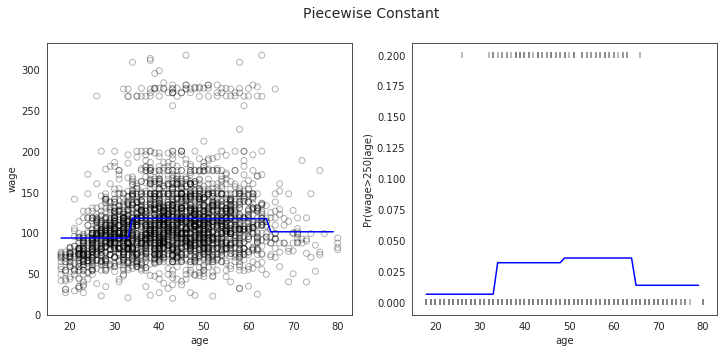

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(dataset.age, dataset.wage, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(age_grid, y_pred2, color='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range
ax2.plot(age_grid, y_pred3, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(dataset.age, y_bi/5, color='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage>250|age)');

## Splines
Using patsy to create non-linear transformations of the input data. See http://patsy.readthedocs.org/en/latest/

### Cubic splines

In [26]:
from patsy import dmatrix

In [27]:
# Specifying 3 knots
X_transformed = dmatrix('bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)',
                        {'dataset.age': dataset.age},
                        return_type='dataframe')
X_transformed.shape

(3000, 7)

In [28]:
fit4 = sm.GLM(dataset.wage, X_transformed).fit()
y_pred4 = fit4.predict(dmatrix('bs(age_grid, knots=(25, 40, 60), degree=3, include_intercept=False)',
                               {'age_grid': age_grid},
                               return_type='dataframe'))
fit4.params

Intercept                                                                    60.493714
bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(dataset.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [29]:
# Specifying 6 degrees of freedom
X_transformed2 = dmatrix('bs(dataset.age, df=6, degree=3, include_intercept=False)',
                         {'dataset.age': dataset.age},
                         return_type='dataframe')
X_transformed2.shape

(3000, 7)

In [30]:
fit5 = sm.GLM(dataset.wage, X_transformed2).fit()
y_pred5 = fit5.predict(dmatrix('bs(age_grid, df=6, degree=3, include_intercept=False)',
                               {'age_grid': age_grid},
                               return_type='dataframe'))

fit5.params

Intercept                                                      56.313841
bs(dataset.age, df=6, degree=3, include_intercept=False)[0]    27.824002
bs(dataset.age, df=6, degree=3, include_intercept=False)[1]    54.062546
bs(dataset.age, df=6, degree=3, include_intercept=False)[2]    65.828391
bs(dataset.age, df=6, degree=3, include_intercept=False)[3]    55.812734
bs(dataset.age, df=6, degree=3, include_intercept=False)[4]    72.131473
bs(dataset.age, df=6, degree=3, include_intercept=False)[5]    14.750876
dtype: float64

### Natural splines

In [31]:
X_transformed3 = dmatrix('cr(dataset.age, df=4)', {'dataset.age': dataset.age}, return_type='dataframe')
X_transformed3.shape

(3000, 5)

In [32]:
fit6 = sm.GLM(dataset.wage, X_transformed3).fit()
y_pred6 = fit6.predict(dmatrix('cr(age_grid, df=4)', {'age_grid': age_grid}, return_type='dataframe'))

fit6.params

Intercept                   79.642095
cr(dataset.age, df=4)[0]   -14.667784
cr(dataset.age, df=4)[1]    36.811142
cr(dataset.age, df=4)[2]    35.934874
cr(dataset.age, df=4)[3]    21.563863
dtype: float64

### Visualizing the result

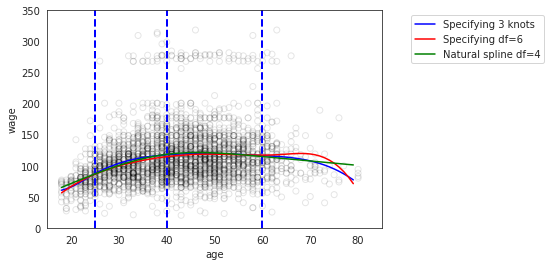

In [33]:
plt.scatter(dataset.age, dataset.wage, facecolor='None', edgecolor='k', alpha=0.1);
plt.plot(age_grid, y_pred4, color='b', label='Specifying 3 knots')
plt.plot(age_grid, y_pred5, color='r', label='Specifying df=6')
plt.plot(age_grid, y_pred6, color='g', label='Natural spline df=4')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

## GAMs
Using pyGAM libraries. See https://pygam.readthedocs.io/en/latest/index.html

### Linear Regression
#### Preparing the dataset

In [34]:
from pygam import LinearGAM, s, f, l

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
education = encoder.fit_transform(dataset.education.values)

In [36]:
education

array([0, 3, 2, ..., 0, 2, 1])

In [37]:
gam_data = np.append(dataset[['year', 'age']].values, education.reshape(-1, 1), axis=1)

In [38]:
gam_data

array([[2006,   18,    0],
       [2004,   24,    3],
       [2003,   45,    2],
       ...,
       [2005,   27,    0],
       [2005,   27,    2],
       [2009,   55,    1]])

#### Fit a Model

In [39]:
gam = LinearGAM(s(0, n_splines=5) + s(1) + f(2)).fit(gam_data, dataset.wage)

In [40]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       22.26
Link Function:                     IdentityLink Log Likelihood:                                -24118.7429
Number of Samples:                         3000 AIC:                                             48284.006
                                                AICc:                                           48284.3852
                                                GCV:                                              1253.479
                                                Scale:                                           1236.7487
                                                Pseudo R-Squared:                                   0.2948
Feature Function                  Lam

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


#### Automatically tune the model

In [41]:
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

In [42]:
gam.gridsearch(gam_data, dataset.wage, lam=lams)

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2) + intercept, 
   tol=0.0001, verbose=False)

In [43]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.2948
Link Function:                     IdentityLink Log Likelihood:                                -24119.7277
Number of Samples:                         3000 AIC:                                            48260.0451
                                                AICc:                                           48260.1229
                                                GCV:                                              1244.089
                                                Scale:                                           1237.1528
                                                Pseudo R-Squared:                                   0.2915
Feature Function                  Lam

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


#### Partial Dependence Functions

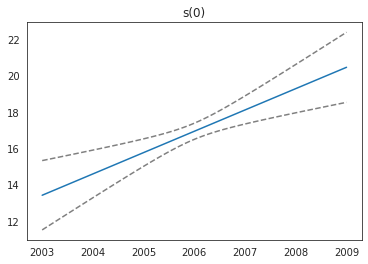

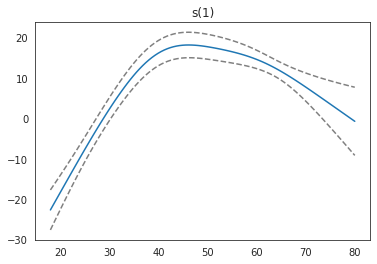

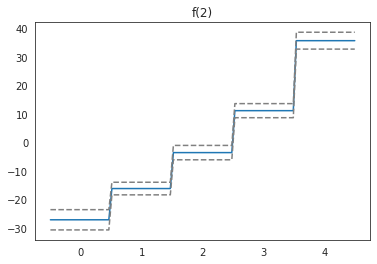

In [44]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='grey', ls='--')
    plt.title(repr(term))
    plt.show()

### Logistic Regression

In [45]:
from pygam import LogisticGAM

In [46]:
# There are no high earners in the <HS category. Hence, we fit a logistic regression GAM using all but this category.
df = dataset[dataset.education != '1. < HS Grad']
df.shape

(2732, 13)

In [47]:
education = LabelEncoder().fit_transform(df.education.values)
X = np.append(df[['year', 'age']].values, education.reshape(-1, 1), axis=1)
y = (df.wage > 250).values.astype(np.int)

In [48]:
clf = LogisticGAM(s(0, n_splines=5) + s(1) + f(2)).gridsearch(X, y, lam=lams)

100% (125 of 125) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


In [49]:
clf.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      8.5039
Link Function:                        LogitLink Log Likelihood:                                  -302.2726
Number of Samples:                         2732 AIC:                                               621.553
                                                AICc:                                             621.6264
                                                UBRE:                                                 2.23
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1551
Feature Function                  Lam

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


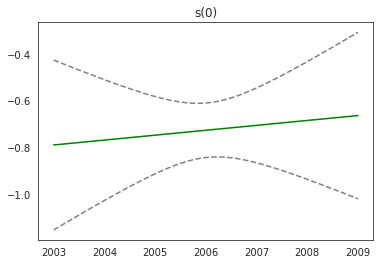

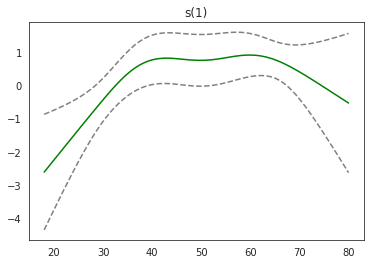

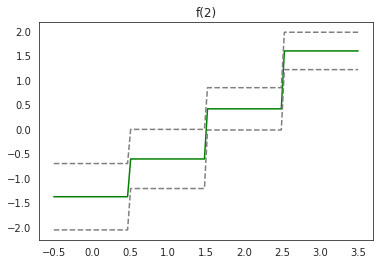

In [50]:
for i, term in enumerate(clf.terms):
    if term.isintercept:
        continue

    XX = clf.generate_X_grid(term=i)
    pdep, confi = clf.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, c='green')
    plt.plot(XX[:, term.feature], confi, c='grey', ls='--')
    plt.title(repr(term))
    plt.show()